# Numpy, Pyplot, Pandas and CERN Open Data

In this module we will discuss some basics on numpy, pyplot and pandas using datasets from the CERN Open Data service as examples. 
Some fluency with all of these packages is expected, however it seems useful to provide a common code base for some basic operations that will be necessary for the next tutorials more specific on *Machine Learning*.

For additional information, some useful reference is provided below.

 * Python: https://www.learnpython.org/, https://www.w3schools.com/python/
 * Pip: https://realpython.com/what-is-pip/ 
 * Numpy: https://numpy.org/doc/stable/user/quickstart.html
 * Matplotlib: https://realpython.com/python-matplotlib-guide/

## Loading data with pandas
The first very common operation when dealing with data is to load them to memory. 
If the dataset is sufficiently small to be completely contained in the RAM of the processor, the whole dataset can be imported into a *pandas DataFrame*, a tabular data structure with efficient and simplified access to the data. 
In case of larger datasets, one should choose among several different possibilities:
 * loading chunks of the dataset into panda dataframe for iterative processing;
 * preprocess the dataset and store it in binary format for accessing it more efficiently in distributed architectures;
 * switching to a computer with more memory. 

To present an example, we will consider a dataset of muon pairs collected by CMS in 2011 and released to the general public through the CERN Open Data portal: https://opendata.cern.ch/record/5202

Muons are elementary particles, with similar properties to electrons, but with a mass ~207 times larger. Because of their properties, muons are highly penetrating particles and are the only charged particles that can traverse the thick calorimeters designed to adsorb the whole energy of electrons, photons and hadrons. This provides a very effective identification technique, that allows to collect highly pure samples of muons and study, for example, their production mechanism. 
In this sample we find muon pairs, composed of a positive and a negative muon ($\mu^+ \mu^-$).

Muon pairs can be produced in proton proton collisions through electromagnetic (and more rarely weak) interactions. Some hadron can decay through electromagnetic interaction and originate a muon pair. If muon pairs are originated in the decay of a heavier particle $h \to \mu^+ \mu^-$, then their invariant mass 
$$
 M = \sqrt{(E_1\ c^2 + E_2\ c^2)^2 - (p_{x1}c + p_{x2}c)^2  - (p_{y1}c + p_{y2}c)^2  - (p_{z1}c + p_{z2}c)^2}
$$
will be the same as for their parent particle. 
In the formula,
 * $E_1$ and $E_2$ are the energy of the two muons
 * $(p_{x1}, p_{y1}, p_{y1})$, $(p_{x2}, p_{y2}, p_{y2})$ are the vectors describing the momentum of the two muons,
 * $c$ is the speed of light

Let's load the dataset from the CERN Open Data into a pandas dataframe. 
From the description web page, we observe that the dataset is made available in csv (*Comma separated values*) format, we can therefore use the pandas function `read_csv` to import the dataset into a dataframe.

In [ ]:
import pandas as pd
df = pd.read_csv ("https://opendata.cern.ch/record/5202/files/Dimuon_SingleMu.csv")

Once imported, the dataset can be investgated with the function `describe`.

In [ ]:
df.describe()

,Run,Event,Q1,pt1,eta1,phi1,E1,px1,py1,pz1,Q2,pt2,eta2,phi2,E2,px2,py2,pz2,M
count,83761.000000,8.376100e+04,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000,83761.000000
mean,167547.906782,4.368082e+08,0.017514,18.063522,-0.026259,-0.069620,41.329796,-0.133240,-0.924966,-0.429794,-0.017514,11.801691,0.040356,0.059519,20.633706,0.107055,0.863215,0.707682,21.855294
std,3785.226399,4.151958e+08,0.999853,19.927901,1.587705,1.814309,42.684773,16.687492,17.032387,54.410648,0.999853,45.680163,1.579138,1.811497,201.144668,22.707898,39.796145,196.937169,31.216046
min,160957.000000,3.227000e+03,-1.000000,0.117700,-2.399900,-3.141500,2.652200,-386.618000,-603.569000,-2244.070000,-1.000000,0.254500,-2.399900,-3.141600,2.520700,-4828.010000,-4820.440000,-31123.300000,0.300100
25%,165364.000000,1.166549e+08,-1.000000,4.945100,-1.545200,-1.638700,13.443800,-6.956400,-8.002200,-19.734100,-1.000000,1.364800,-1.564800,-1.508300,4.560000,-1.716700,-1.559400,-5.627500,2.558700
50%,166784.000000,3.132856e+08,1.000000,15.985800,-0.054900,-0.122800,27.891500,-0.000500,-0.411700,-0.925400,-1.000000,3.175200,0.082800,0.112800,7.419100,-0.008300,0.128400,0.944900,6.266200
75%,171446.000000,5.998179e+08,1.000000,26.040500,1.497500,1.488800,55.338000,6.745100,5.910700,18.420000,1.000000,18.068700,1.615300,1.631400,25.936700,1.780300,2.016500,6.023400,23.201500
max,173692.000000,3.107981e+09,1.000000,3161.430000,2.400000,3.141600,2377.590000,291.470000,683.853000,2185.700000,1.000000,9319.790000,2.400000,3.141600,47758.800000,891.822000,9237.750000,46840.600000,296.812000


A single column can be extracted with the square-bracket operator (*getitem*) as a `pandas Series`, representing a single column composed of an index the associated values.

In [ ]:
invariant_mass = df['M']
print (invariant_mass)

0         2.1330
1        13.6786
2         4.3813
3         3.2587
4         4.0171
          ...   
83756     2.8234
83757     1.6556
83758    10.2510
83759     1.1724
83760    14.9641
Name: M, Length: 83761, dtype: float64


Values can be extracted into a  `numpy` array using the `values` keyword. Simlarly, `index` allow to access the index column.

In [ ]:
m = invariant_mass.values
idx = invariant_mass.index

print ("Mass values:", m)
print ("Indices:", idx)

Mass values: [ 2.133  13.6786  4.3813 ... 10.251   1.1724 14.9641]
Indices: RangeIndex(start=0, stop=83761, step=1)


## Plotting histograms
The content of the `numpy array`, or the `pandas Series` directly, can be used to fill an histogram and get information on the distribution of the selected quantities.

Many `Python` packages exist to draw plots and histograms. The most common and widely applied is `pyplot` made available within the `matplotlib` bundle. 


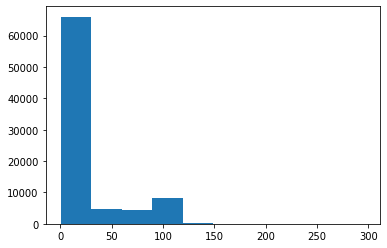

In [ ]:
import matplotlib.pyplot as plt
plt.hist (invariant_mass)
plt.show()

We obtained this histogram very easily, but unfortunately the result is not particularly readable. First of all we should refine the binning scheme, we need more bins and we can happily exclude everything beyond 150 GeV/c.
In order to define the binning scheme we will use the numpy function `linspace` to define the boundaries of the bins. 
`linspace` produces a series of equidistant values given the lower value, the higher value and the number of values.

> **Note!** The number of boundaries, used to define the binning scheme, is the number of bins plus 1.

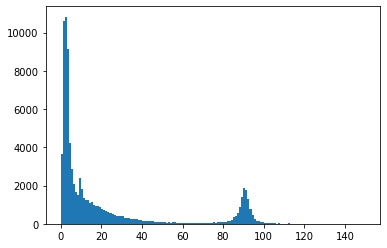

In [ ]:
import numpy as np 
boundaries = np.linspace(0, 150, 151) # 151 boundaries from 0 to 150 GeV.
plt.hist (invariant_mass, bins=boundaries)
plt.show()

Much better! But still the readability is not sufficient. We should include axes labels, maybe a title and possibly a legend.

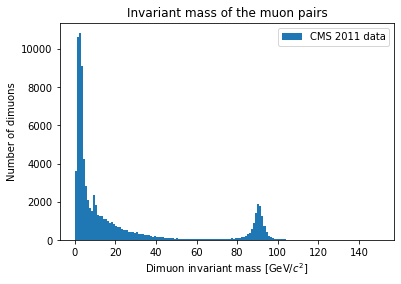

In [ ]:
boundaries = np.linspace(0, 150, 151) # 151 boundaries from 0 to 150 GeV.
plt.hist (invariant_mass, bins=boundaries, label = "CMS 2011 data")
plt.title ("Invariant mass of the muon pairs")
plt.xlabel ("Dimuon invariant mass [GeV/$c^2$]")
plt.ylabel ("Number of dimuons")
plt.legend()
plt.show()

## Selecting data from a pandas DataFrame with `query`
The histogram shown above highlights three regions of interest. One below 5 GeV, one aroung 10 GeV and one around 90 GeV. 

We can use the function `query` of the pandas dataframe in order to select these data from the whole dataset.

In [ ]:
lowM = df.query ( "M < 5" ) ['M']
midM = df.query ( "M > 8 and M < 13") ['M']
highM = df.query ( "M > 70 and M < 110") ['M']

We can then superpose to the full histograms, the histograms obtained once these selections are applied. 

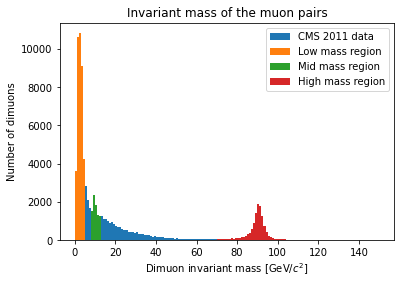

In [ ]:
boundaries = np.linspace(0, 150, 151) # 151 boundaries from 0 to 150 GeV.
plt.hist (invariant_mass, bins=boundaries, label = "CMS 2011 data")
plt.hist (lowM, bins=boundaries, label = "Low mass region")
plt.hist (midM, bins=boundaries, label = "Mid mass region")
plt.hist (highM, bins=boundaries, label = "High mass region")
plt.title ("Invariant mass of the muon pairs")
plt.xlabel ("Dimuon invariant mass [GeV/$c^2$]")
plt.ylabel ("Number of dimuons")
plt.legend()
plt.show()

When superposing histograms it is sometimes useful to show some of them as "empty" with only a line identifying the bin content. This can be achieved using the `histtype='step'` keyword argument:

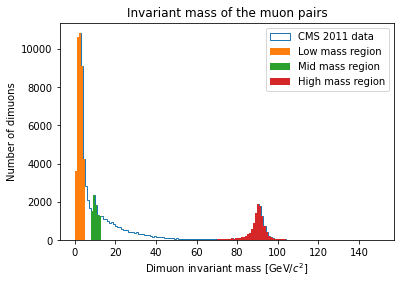

In [ ]:
boundaries = np.linspace(0, 150, 151) # 151 boundaries from 0 to 150 GeV.
plt.hist (invariant_mass, bins=boundaries, label = "CMS 2011 data", histtype='step', linewidth=1)
plt.hist (lowM, bins=boundaries, label = "Low mass region")
plt.hist (midM, bins=boundaries, label = "Mid mass region")
plt.hist (highM, bins=boundaries, label = "High mass region")
plt.title ("Invariant mass of the muon pairs")
plt.xlabel ("Dimuon invariant mass [GeV/$c^2$]")
plt.ylabel ("Number of dimuons")
plt.legend()
plt.show()

Another common specification is `density = True` which allows to normalize the histogram. This is particularly useful when comparing the distributions of datasets composed by a different amount of samples. 
For example, let's consider the transverse momentum distribution at high and low mass:

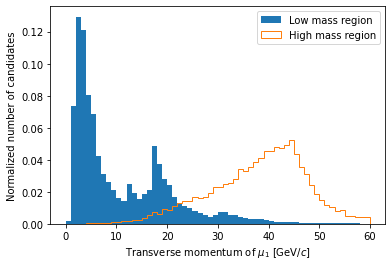

In [ ]:
boundaries = np.linspace (0, 60, 61)
plt.hist ( df.query ("M < 5") ['pt1'], bins = boundaries, label="Low mass region", density=True)
plt.hist ( df.query ("M > 70 and M < 110") ['pt1'], bins = boundaries, label="High mass region", histtype = 'step', density=True)


plt.xlabel ('Transverse momentum of $\mu_1$ [GeV/$c$]')
plt.ylabel ('Normalized number of candidates')
plt.legend()
plt.show()

As expected, the decay of a heavier particle produces muons with higher transverse momentum.

## Filtering data from a panda DataFrame with `boolean` series
The `query` function is extremely simple and useful for intuitive and exploratory analysis. Unfortunately only a tiny subset of the operations possible in Python are valid in the *pandas query language*. For this reason is sometimes useful to define a boolean series to filter the dataset. 
A boolean series is a `pandas series` associating to each index (corresponding to a row if the dataframe) a `True`/`False` value. When applied to a Series or to a DataFrame with the square-bracket operator, only the rows for which the boolean series is `True` are retained. 

Let's see an example. Let's start defining and inspecting a *boolean series* by selecting the rows with mass above 5 GeV/$c^2$.

In [ ]:
boolean_series = df['M'] > 5

print (boolean_series)

0        False
1         True
2        False
3        False
4        False
         ...  
83756    False
83757    False
83758     True
83759    False
83760     True
Name: M, Length: 83761, dtype: bool


We can then update the boolean series, requiring for example that the mass has to be also lower than 15 GeV/$c^2$.

In [ ]:
boolean_series &= df['M'] < 15

print (boolean_series)

0        False
1         True
2        False
3        False
4        False
         ...  
83756    False
83757    False
83758     True
83759    False
83760     True
Name: M, Length: 83761, dtype: bool


Or equivalently,

In [ ]:
same_boolean_series = (df['M'] > 5) & (df['M'] < 15)

print ("Are the two series equal, for all rows?", np.all ( boolean_series == same_boolean_series ))

Are the two series equal, for all rows? True


 > **Note!** The AND operator used in the *query* languagge is `and` while in Python it is `&`. Indeed in Python, the `and` keyword is reserved for logic operation between boolean variables. An array or a series of boolean variables is not a boolean variable so that the `and` operator fails. The `&` operator, introduced in Python as bitwise operator, has been *pverridden* in the classes describing `numpy arrays` and `pandas series` to describe the and element-wise operator between elements of two same-sized objects. Similarly the `or` operator, valid in `query` language, is replaced by the `|` operator in Python.
 
 > **Note!** In Python the operator `&` has precedence over the comparison operators `>` and `<` as inherited from C. It is therefore important to protect the conditions within parentheses to avoid puzzling errors. 

Once the boolean series is defined, the square-bracket operator can be used to apply it to a given dataframe.

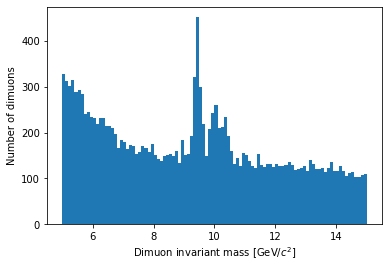

In [ ]:
lowM = df [boolean_series]
plt.hist ( lowM ['M'], bins = np.linspace(5,15,101) )
plt.xlabel ("Dimuon invariant mass [GeV/$c^2$]")
plt.ylabel ("Number of dimuons")
plt.show()

## Adding columns to DataFrames with `eval`
It is sometimes useful to add columns with partial results to the dataset, for example we may want to include the variables `theta1` and `theta2` describing the polar angles of the two muons.
Similarly to what happens for the selection, as long as the operation is sufficiently simple we can use a `pandas` service function, named `eval` this time. 

In [ ]:
extended_df = df.eval ( "theta1 = arctan (pt1/pz1)").eval ("theta2 = arctan (pt2/pz2)")

Once the column is included in the dataset, we can deal with it exactly as with the original variables

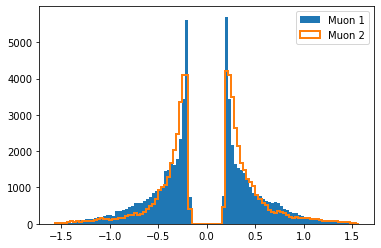

In [ ]:
thetaAxis = np.linspace ( -np.pi/2, np.pi/2, 101)
plt.hist (extended_df['theta1'], bins = thetaAxis, label = "Muon 1")
plt.hist (extended_df['theta2'], bins = thetaAxis, label = "Muon 2", histtype='step', linewidth=2)
plt.legend()
plt.show()

## Adding Series to a DataFrame
In case the `eval` function is not sufficient for the complexity of the operation we need to describe, we can define series with the new values and assign them to a given column in the DataFrame.

As an example we compute the [pseudorapidity](https://en.wikipedia.org/wiki/Pseudorapidity) of the two muons, defined as 
$$
\eta = -\log \left[\tan \left(\frac\theta2\right)\right]
$$

In [ ]:
eta1_series = -np.log ( np.tan (0.5 * np.abs(extended_df['theta1'])) ) 
eta2_series = -np.log ( np.tan (0.5 * np.abs(extended_df['theta2'])) ) 
print ("Pseudorapidity of Muon2:\n", eta2_series)
extended_df['eta1'] = eta1_series
extended_df['eta2'] = eta2_series

Pseudorapidity of Muon2:
 0        2.246348
1        0.764494
2        1.432174
3        1.929890
4        1.973535
           ...   
83756    1.316312
83757    2.183693
83758    1.644453
83759    1.088470
83760    2.175701
Name: theta2, Length: 83761, dtype: float64


The two techniques can be easily mixed, for example we can define the average pseudorapidity of each muon pair as 

In [ ]:
extended_df['etaAvg'] = extended_df.eval("eta1 + eta2")/2

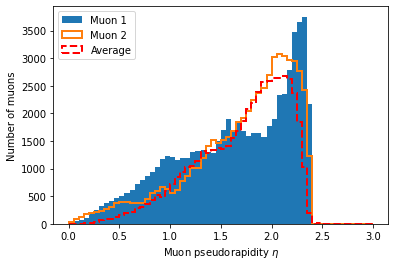

In [ ]:
plt.hist (extended_df['eta1'], bins = np.linspace (0,3, 61), label = "Muon 1")
plt.hist (extended_df['eta2'], bins = np.linspace (0,3, 61), label = "Muon 2", histtype='step', linewidth=2)
plt.hist (extended_df['etaAvg'], bins = np.linspace (0,3, 61), label = "Average",
          linestyle = '--', histtype='step', linewidth=2, color='red')
plt.xlabel ( "Muon pseudorapidity $\eta$")
plt.ylabel ( "Number of muons" )
plt.legend()
plt.show()

## Plotting trends and curves
Let's consider the high mass region, where a well pronounced peak is visibile and contributions from non-resonant dimuons seems negligible.
> **Curiosity**: This resonant contribution to the production of dimuons is due to decays of the $Z^0$ bosons to $\mu^+\mu^-$.

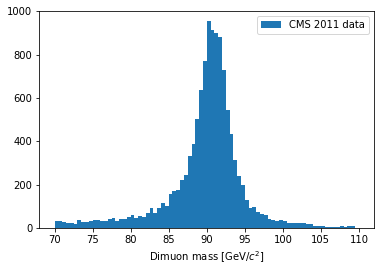

In [ ]:
boundaries = np.linspace (70, 110, 81)
highM = extended_df.query ( "M > 70 and M < 110")
plt.hist (highM['M'], bins=boundaries, label="CMS 2011 data")
plt.xlabel ( "Dimuon mass [GeV/$c^2$]")
plt.legend()
plt.show()

We wonder if the average value of the peak is stable for event reconstructed in different regions of the detector, for example at different pseudorapidity.
Let's consider the pseudorapidity distribution in this mass region,

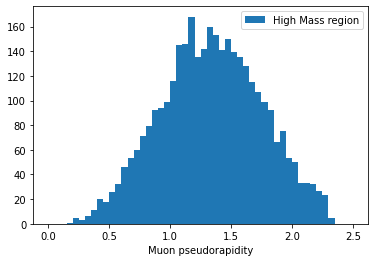

In [ ]:
plt.hist (highM['etaAvg'], bins = np.linspace(0,2.5,51), label="High Mass region")
plt.xlabel ("Muon pseudorapidity")
plt.legend()
plt.show()

Let's divide the pseudorapidity in large bins, with approximately the same populations, for example:

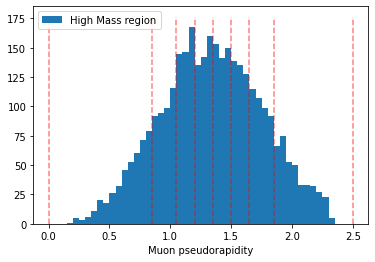

In [ ]:
eta_boundaries = 0, 0.85, 1.05, 1.2, 1.35, 1.5, 1.65, 1.85, 2.5

plt.hist (highM['etaAvg'], bins = np.linspace(0,2.5,51), label="High Mass region")
## Gets the boundaries of the y axis to draw the separators
ylow, yhigh = plt.gca().get_ylim()
for boundary in eta_boundaries:
    plt.plot ( (boundary, boundary), (ylow, yhigh), linestyle='--', color='red', alpha = 0.5 )
    
plt.xlabel ("Muon pseudorapidity")
plt.legend()
plt.show()

First of all, we check whether we succeeded in our attempt of getting similar population.
Note how we construct the loop over the bins starting from the sequence of boundaries. 
We consider two copies of the original sequence, one containing all but the last entry will represent the lower limit of each bin, the other one, containing all but the first entry, will represent the higher boundary of each bin. 
Through the `zip` iterator we make loop on the pairs of boundaries.

Once we have the boundaries for each bin, we can use the Python `len` instruction to count the number of rows selected with a `query` instruction.

In [ ]:
for low, high in zip(eta_boundaries[:-1], eta_boundaries[1:]):
    n_entries = len(highM.query(f"etaAvg >= {low} and etaAvg < {high}"))
    print (f"Eta bin from {low:.2f} to {high:.2f} contains {n_entries} candidates")

Eta bin from 0.00 to 0.85 contains 431 candidates
Eta bin from 0.85 to 1.05 contains 401 candidates
Eta bin from 1.05 to 1.20 contains 459 candidates
Eta bin from 1.20 to 1.35 contains 437 candidates
Eta bin from 1.35 to 1.50 contains 444 candidates
Eta bin from 1.50 to 1.65 contains 402 candidates
Eta bin from 1.65 to 1.85 contains 413 candidates
Eta bin from 1.85 to 2.50 contains 397 candidates


Following the same scheme, we can now compute different quantities, such as the average value of the dimuon invariant mass (`np.mean`) or its root mean squared error (`np.std`).

For each bin, we append to a list the central value of the bin and the results of our computations. One list per result.

In [ ]:
bin_centers = []
bin_averages = []
bin_rmss = []
for low, high in zip(eta_boundaries[:-1], eta_boundaries[1:]):
    bin_centers.append (0.5*(low+high))
    bin_df = highM.query(f"etaAvg >= {low} and etaAvg < {high}")
    bin_averages.append ( np.mean (bin_df['M']) )
    bin_rmss.append ( np.std (bin_df['M']) )

Once the list are filled, we can use the `plot` function of `pyplot` to render the variation of the results across the different bins.

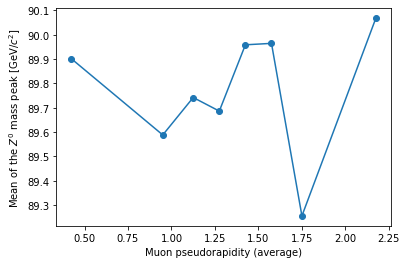

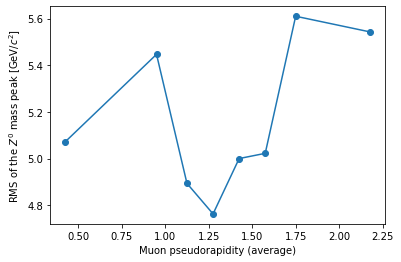

In [ ]:
plt.plot (bin_centers, bin_averages, 'o-')
plt.xlabel("Muon pseudorapidity (average)")
plt.ylabel("Mean of the $Z^0$ mass peak [GeV/$c^2$]")
plt.show()
plt.plot (bin_centers, bin_rmss, 'o-')
plt.xlabel("Muon pseudorapidity (average)")
plt.ylabel("RMS of the $Z^0$ mass peak [GeV/$c^2$]")
plt.show()

### Bonus track
In the following cell we show an example of profile plot, where we show for each pseudorapidity bin the mean and the 1$\sigma$ band of the transverse momentum distribution.

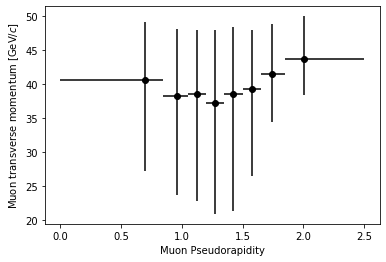

In [ ]:
bin_centers = []
pt_low = []
pt_high = []
pt_average = []
for low, high in zip(eta_boundaries[:-1], eta_boundaries[1:]):
    bin_df = highM.query(f"etaAvg >= {low} and etaAvg < {high} and pt1 < 1000 and pt2 < 1000 ")
    bin_centers.append (np.quantile(bin_df['etaAvg'], 0.5))
    pts = np.concatenate ((bin_df['pt1'], bin_df['pt2']))
    pt_average.append (np.mean(pts))
    pt_low.append (np.quantile(pts, 0.5-0.68/2))
    pt_high.append (np.quantile(pts, 0.5+0.68/2))

lower_boundaries = np.array(eta_boundaries[:-1])
upper_boundaries = np.array(eta_boundaries[1:])
bin_centers = np.array(bin_centers)
pt_low = np.array(pt_low)
pt_high = np.array(pt_high)
pt_average = np.array (pt_average)
plt.errorbar (x=bin_centers, y=pt_average, xerr=(bin_centers-lower_boundaries, upper_boundaries-bin_centers), yerr=(pt_average-pt_low, pt_high-pt_average), fmt='ko')
plt.xlabel ("Muon Pseudorapidity")
plt.ylabel ("Muon transverse momentum [GeV/$c$]")
plt.show()

# Reading nTuples with `uproot`
Most of the dataset in *particle physics* are made available in a binary format defined within the [ROOT framework](https://root.cern). 
In ROOT, datasets are usually organized in [`TTree`s](https://root.cern.ch/doc/master/classTTree.html) objects stored in a [TFile](https://root.cern.ch/doc/master/classTFile.html). A unique `key` identifies each `TTree` in a `TFile`.
A `TTree` is composed of `TBranch`es which are a generalization of columns. Each `TBranch` can have several leaves that actually contain the data. 
Often for data analysis `TTree`s are used to represent data in a tabular format, where the `TTree` is simply a table and the `TBranch`es are simply its columns. This data format is usually referred to as *nTuple*s. 

ROOT files, and in particular *nTuples* can be accessed without installing the full ROOT framework using [uproot](https://github.com/scikit-hep/uproot3). 

If missing on your system, `uproot` can be installed simply with 
```
pip install --upgrade uproot
```

In [ ]:
!pip install --upgrade uproot
import uproot

     |████████████████████████████████| 215kB 5.0MB/s 


`uproot` is designed to access dataset stored in one or more `.root` files as `TTree` and translate them into `DataFrame` or other formats to ease data analysis.
Let's consider for example the LHCb dataset of $D^0 \to K^- \pi^+$ decays used for the LHC Masterclass programme: https://opendata.cern.ch/record/401
This dataset contains about $90 \times 10^3$ decay candidates for the $D^0$ or $\bar D^0$ mesons to a kaon and a pion. 

The $D^0$ meson is composed of a charm quark and an anti-up anti-quark ($c\bar u$), while the $\bar D^0$ meson, its anti-particle, is composed of an anti-charm anti-quark and an up quark ($\bar cu$). 

To read the dataset into a `DataFrame`, let's first define the list of files to open and the list of branches we are interested in:
 * `D0_PT` which represents the transverse momentum of the $D^0$ hadron;
 * `D0_MM` which represents the invariant mass of the $K^\pm\pi^\mp$ combination;
 * `D0_TAU` which represents the proper decay time of the $D^0$ meson;
 * `D0_MINIPCHI2` which is a measure of the inconsistency of the $D^0$ trajectory with the proton-proton collision (or primary vertex). A large $\chi^2$ indicates poor consistency and points towards a secondary production of the $D^0$ meson (for example from a $b$-hadron decay) or random combinations of kaon and pions produced in different proton-proton interactions.

In [ ]:
files = ["https://opendata.cern.ch/record/401/files/MasterclassData.root"]
branches = ["D0_MINIPCHI2", "D0_PT", "D0_MM", "D0_TAU"]
df = pd.concat(uproot.iterate(files, filter_name = branches, library='pd'))
df.describe()

,D0_MINIPCHI2,D0_PT,D0_MM,D0_TAU
count,91583.000000,91583.000000,91583.000000,91583.000000
mean,457.482819,3448.941895,1864.111084,-0.052523
std,6381.462891,1301.059448,25.564924,2.311997
min,0.000014,755.268616,1766.209595,-100.000000
25%,2.124485,2723.341797,1845.991882,0.000185
50%,6.298690,3048.925781,1864.078125,0.000272
75%,27.436283,3676.466553,1881.531250,0.000605
max,891711.062500,64509.949219,2453.658447,0.578799


As discussed above, we can now plot the distributions of these variables and analyse the dataset.
This dataset is used in the LHCb masterclass to drive high-school students into the measurement of the $D^0$ lifetime by fitting the decay time distribution, properly treating the background contributions.

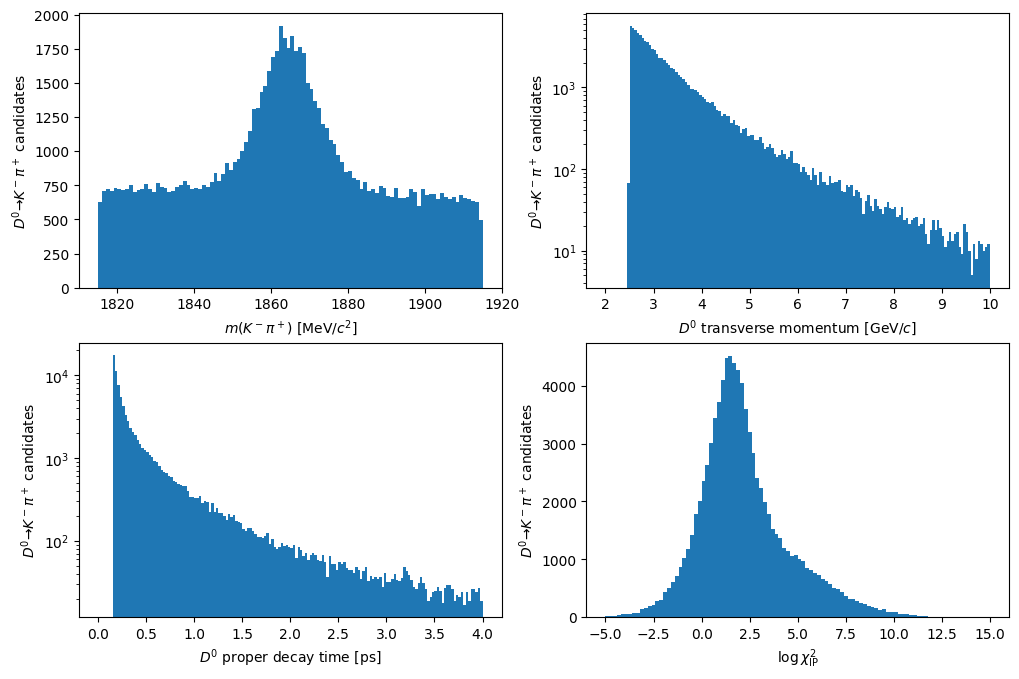

In [ ]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.subplot(221)
plt.hist ( df['D0_MM'], bins = np.linspace(1815, 1915, 101))
plt.xlabel ( "$m (K^-\pi^+)$ [MeV/$c^2$]")
plt.ylabel ( "$D^0 \\to K^- \pi^+$ candidates")
plt.subplot(222)
plt.hist ( df['D0_PT']*1e-3, bins = np.linspace(2, 10, 161))
plt.yscale ('log')
plt.xlabel ( "$D^0$ transverse momentum [GeV/$c$]")
plt.ylabel ( "$D^0 \\to K^- \pi^+$ candidates")
plt.subplot(223)
plt.hist ( df['D0_TAU']*1e3, bins = np.linspace(0, 4, 161))
plt.xlabel ( "$D^0$ proper decay time [ps]")
plt.ylabel ( "$D^0 \\to K^- \pi^+$ candidates")
plt.yscale ('log')
plt.subplot(224)
plt.hist ( np.log(df['D0_MINIPCHI2']), bins = np.linspace(-5, 15, 101))
plt.xlabel ( "$\log\,\chi^2_{\mathrm{IP}}$")
plt.ylabel ( "$D^0 \\to K^- \pi^+$ candidates")
fig.show()

# Supplementary material

### First step
Split the dataset in two subsamples one containing only background events, for example invariant masses in the two range s  (1820, 1840) and (1890, 1910) MeV/$c^2$, named **background** and one region, named **signal box** containing signal and background with invariant mass in the range (1850, 1880) MeV/$c^2$.

The number of events in the signal box is due to the sum of $S$ signal event and $B$ background events. 
If the number of events in the **signal box** is $s$ and the number of events **background** region is $b$, then
$$
s = S+B \\[5mm]
B \approx \frac{(1880 - 1850)\ \mathrm{MeV}/c^2}{(1840 - 1820) + (1910 - 1890)\ \mathrm{MeV}/c^2} \ b
$$

which results in the following expression for the number of signal events

$$
S \approx s - \frac{(1880 - 1850)\ \mathrm{MeV}/c^2}{(1840 - 1820) + (1910 - 1890)\ \mathrm{MeV}/c^2} \ b
$$

### Second step
Study the number of signal and background events in bins of the $D^0$ transverse momentum. 

The number of signal events should decrease more slowly increasing $p_T$ than the background yield. This indicates that removing the low transverse momentum events should increase the purity of the selected sample.

### Third step
Define and plot the signal purity and the background rejection as a function of a threshold on the transverse momentum of the $D^0$ hadron. 

Signal purity is defined as 
$$
\mathrm{purity}(p_{\mathrm{T}, min}) = \frac{S (p_\mathrm{T} > p_{\mathrm{T}, min})}{S (p_\mathrm{T} > p_{\mathrm{T}, min}) + B (p_\mathrm{T} > p_{\mathrm{T}, min})}
$$

Background-rejection is defined as 
$$
\mathrm{rejection}(p_{\mathrm{T}, min}) = \frac{B - B (p_\mathrm{T} > p_{\mathrm{T}, min})}{B}
$$

where $S(cut)$ indicates the number of signal events once *cut* is applied, and similarly $B(cut)$ indicates the number of background events once *cut* is applied.

### Fourth step
Define a function that takes as an input the dataframe and three thresholds on $p_T$, $\log\chi^2_{\mathrm{IP}}$ and $D^0$ decay time and return the detection significance defined as 

$$
cut = \left(p_\mathrm{T} > p_\mathrm{{T}, min}\qquad \& \qquad \log\chi^2_{\mathrm{IP}} < \log\chi^2_{\mathrm{IP, \mathrm{max}}} \qquad \& \qquad \tau_D > \tau_{D,min}\right)\\[5mm] 
\mathrm{significance} = \frac{S (cut)}{\sqrt{S(cut) + B (cut)+1}}
$$

### Fifth step (bonus, not discussed in next lectures)
Try using `scipy.optimize` module to maximise the significance.